## CEJST Education Metrics Analysis

### 1. Objective
    Assess the level of educational attainment across counties.

    Compare educational outcomes (e.g., high school diploma attainment, higher education rates) across racial and socioeconomic groups.
    
    Highlight disparities and patterns in education metrics for policymaking and resource allocation.

### 2. Tools and Libraries Used
    Pandas: For data manipulation and preprocessing.

    GeoPandas: For spatial data handling and geographic visualizations.

    Matplotlib and Seaborn: For plotting and data visualization.

    Folium: For creating interactive geographic maps.

    Scikit-learn: Specifically for scaling the education metrics.

    Shapely: For geometric operations such as merging county shapes.
    
3. Dataset Description
Education Metrics Data: Includes variables such as:
Percentage of adults with less than a high school diploma.
Percentage of adults with a high school diploma or equivalent.
Percentage of adults with a bachelor's degree or higher.
CEJST Shapefile: A GeoDataFrame containing geographic data for census tracts, filtered to focus on specific states (e.g., Tennessee).
4. Data Preprocessing
Imported the education metrics dataset and filtered geographic shapefile data for relevant states to improve computational efficiency.
Merged the shapefile data with education metrics based on geographic keys (NAMELSADCO).
Converted the merged dataset into a GeoDataFrame for spatial analysis.
5. Data Normalization
Used MinMaxScaler from Scikit-learn to normalize key education indicators:

Percentage of adults with less than a high school diploma.
Percentage of adults with a high school diploma or equivalent.
Percentage of adults with a bachelor's degree or higher.
6. Calculating the Education Score
A composite Education Score was calculated by averaging the normalized education metrics, providing an overall indicator of education outcomes per region.
7. Data Aggregation
Counties were aggregated using:

Demographic and education metrics: Averages calculated across tracts.
Geometric aggregation: Combined spatial data using the unary_union function from Shapely.
8. Visualizations
Interactive Maps:
Created layered maps using Folium to visualize the Education Score and percentage of adults with a bachelor's degree or higher.
Enabled interactivity with tooltips and layer toggles.
Bar Charts:
Highlighted the top 5 counties with the highest percentage of adults holding a bachelor's degree or higher using horizontal bar charts.
Histograms:
Displayed the distribution of education scores to identify patterns and outliers.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.patches as mpatches
from pandas import cut
from matplotlib import colormaps as cmap
import folium
from shapely.ops import unary_union

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
plt.style.use("ggplot")

In [12]:
edu_cols = [
    'Census tract 2010 ID', 
    'County Name', 
    'State/Territory',
    'Total population', 
    'Percent American Indian / Alaska Native', 
    'Percent Asian', 'Percent Black or African American alone', 
    'Percent Hispanic or Latino', 
    'Percent Native Hawaiian or Pacific',
    'Percent other races', 
    'Percent White',
    'Percent individuals age 25 or over with less than high school degree',
    'Percent of residents who are not currently enrolled in higher ed', 
    'Is there at least one abandoned mine in this census tract?',
    'Percent age 10 to 64', 
    'Percent age over 64', 
    'Percent age under 10'
]

In [13]:
edu_stats = pd.read_csv(r"C:\\New_499_Code\\499_Cleaned_Abbreviated_CEJST_Disadvantaged_Communities_Data.csv", usecols=edu_cols)
edu_stats.head(2)

C:\Users\Kassidi\AppData\Local\Temp\ipykernel_20564\3781865900.py:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  edu_stats = pd.read_csv(r"C:\\New_499_Code\\499_Cleaned_Abbreviated_CEJST_Disadvantaged_Communities_Data.csv", usecols=edu_cols)


,Census tract 2010 ID,County Name,State/Territory,Percent Black or African American alone,Percent American Indian / Alaska Native,Percent Asian,Percent Native Hawaiian or Pacific,Percent White,Percent Hispanic or Latino,Percent other races,Percent age under 10,Percent age 10 to 64,Percent age over 64,Total population,Is there at least one abandoned mine in this census tract?,Percent individuals age 25 or over with less than high school degree,Percent of residents who are not currently enrolled in higher ed
0,1001020100,Autauga County,Alabama,0.07,0.0,0.0,0.00,0.83,0.01,0.0,0.10,0.76,0.13,1993.0,NaN,12.0,91.0
1,1001020200,Autauga County,Alabama,0.57,0.0,0.0,0.01,0.38,0.01,0.0,0.12,0.73,0.14,1959.0,NaN,14.0,96.0


In [ ]:
CEJST_shapefile_path = r"C:\New_499_Code\assets\cb_2021_us_tract_500k\cb_2021_us_tract_500k.shp"
CEJST_Shapefile = gpd.read_file(CEJST_shapefile_path)

#Filter the GeoDataFrame because it takes 20 minutes to run otherwise
filtered_CEJST_Shapefile = CEJST_Shapefile[CEJST_Shapefile['STATE_NAME'].isin(['Tennessee', 'Kentucky', 'West Virginia', 'Virginia'])]
filtered_CEJST_Shapefile.head(2)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry
24,51,047,930400,1400000US51047930400,51047930400,9304,Census Tract 9304,VA,Culpeper County,Virginia,CT,320115131,3342978,"POLYGON ((-77.99564 38.47463, -77.99117 38.473..."
113,21,205,950302,1400000US21205950302,21205950302,9503.02,Census Tract 9503.02,KY,Rowan County,Kentucky,CT,147818267,13764911,"POLYGON ((-83.55783 38.11808, -83.55600 38.119..."


In [15]:
#merge the environmental data with the shapefile, keep all columns 
edu_stats = filtered_CEJST_Shapefile.merge(edu_stats, left_on='NAMELSADCO', right_on='County Name', how='left')
edu_stats.head(2)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,...,Percent White,Percent Hispanic or Latino,Percent other races,Percent age under 10,Percent age 10 to 64,Percent age over 64,Total population,Is there at least one abandoned mine in this census tract?,Percent individuals age 25 or over with less than high school degree,Percent of residents who are not currently enrolled in higher ed
0,51,047,930400,1400000US51047930400,51047930400,9304,Census Tract 9304,VA,Culpeper County,Virginia,...,0.77,0.05,0.01,0.14,0.7,0.14,4162.0,NaN,16.0,96.0
1,51,047,930400,1400000US51047930400,51047930400,9304,Census Tract 9304,VA,Culpeper County,Virginia,...,0.85,0.05,0.01,0.10,0.7,0.19,8991.0,NaN,9.0,95.0


In [16]:
#check to see if edu_stats is a geoDataFrame
type(edu_stats)

geopandas.geodataframe.GeoDataFrame

In [17]:
edu_stats_filtered = edu_stats[edu_stats['STATE_NAME'].isin(['Tennessee', 'Kentucky', 'West Virginia'])]

In [18]:
print(edu_stats.crs)

EPSG:4269


In [19]:
from sklearn.preprocessing import MinMaxScaler
edu_stats = edu_stats.applymap(lambda x: 1 if x is True else (0 if x is False else x))

#normalize 
scaler = MinMaxScaler()

columns_to_scale = [
    'Percent individuals age 25 or over with less than high school degree',
    'Percent of residents who are not currently enrolled in higher ed', 
    'Is there at least one abandoned mine in this census tract?'
]

#scaley 
edu_stats[columns_to_scale] = scaler.fit_transform(edu_stats[columns_to_scale])                                                                                                                                                              

edu_stats['Education Score'] = (
    edu_stats['Percent individuals age 25 or over with less than high school degree'] +
    edu_stats['Percent of residents who are not currently enrolled in higher ed'] +
    edu_stats['Is there at least one abandoned mine in this census tract?'] 
) / 3 

print(edu_stats[['Census tract 2010 ID', 'County Name', 'Education Score']])

C:\Users\Kassidi\AppData\Local\Temp\ipykernel_20564\2876910064.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  edu_stats = edu_stats.applymap(lambda x: 1 if x is True else (0 if x is False else x))


        Census tract 2010 ID      County Name  Education Score
0                51047930101  Culpeper County              NaN
1                51047930102  Culpeper County              NaN
2                51047930201  Culpeper County              NaN
3                51047930202  Culpeper County              NaN
4                51047930300  Culpeper County              NaN
...                      ...              ...              ...
877224           54011010500    Cabell County              NaN
877225           54011010600    Cabell County              NaN
877226           54011010700    Cabell County              NaN
877227           54011010800    Cabell County              NaN
877228           54011010900    Cabell County              NaN

[877229 rows x 3 columns]


In [20]:
edu_stats_copy = edu_stats.copy()

edu_stats_copy = edu_stats_copy.groupby(['County Name', 'State/Territory']).agg(
    {
        'Total population': 'mean',
        'Percent American Indian / Alaska Native': 'mean',
        'Percent Asian': 'mean',
        'Percent Black or African American alone': 'mean',
        'Percent Hispanic or Latino': 'mean',
        'Percent Native Hawaiian or Pacific': 'mean',
        'geometry': lambda x: unary_union(x),  # Combine multiple geometries
        'Percent individuals age 25 or over with less than high school degree': 'mean',
        'Percent of residents who are not currently enrolled in higher ed': 'mean', 
        'Is there at least one abandoned mine in this census tract?': 'mean',
        'Percent age 10 to 64': 'mean',
        'Percent age over 64': 'mean',
        'Percent age under 10': 'mean',
        'Education Score': 'mean'
    }
).reset_index()

edu_stats_copy = gpd.GeoDataFrame(edu_stats_copy)

type(edu_stats_copy)

geopandas.geodataframe.GeoDataFrame

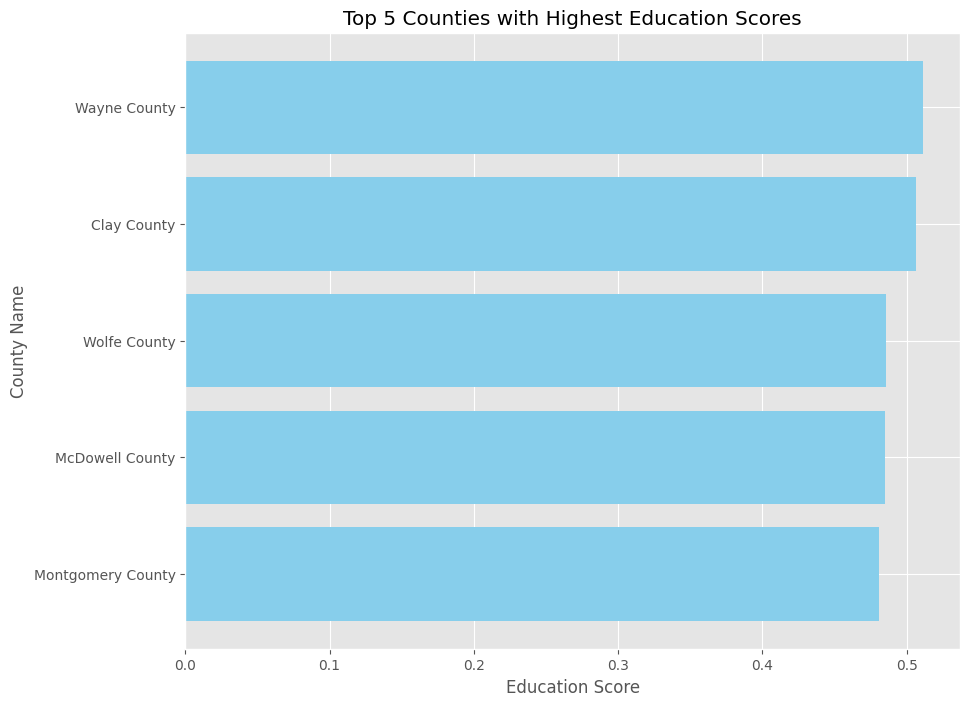

In [21]:
#top 5 counties with highest education scores
top_5_education = edu_stats_copy.nlargest(5, 'Education Score')
top_5_education = top_5_education.sort_values('Education Score', ascending=True)

plt.barh(top_5_education['County Name'], top_5_education['Education Score'], color='skyblue')
plt.xlabel('Education Score')
plt.ylabel('County Name')
plt.title('Top 5 Counties with Highest Education Scores')
plt.show()

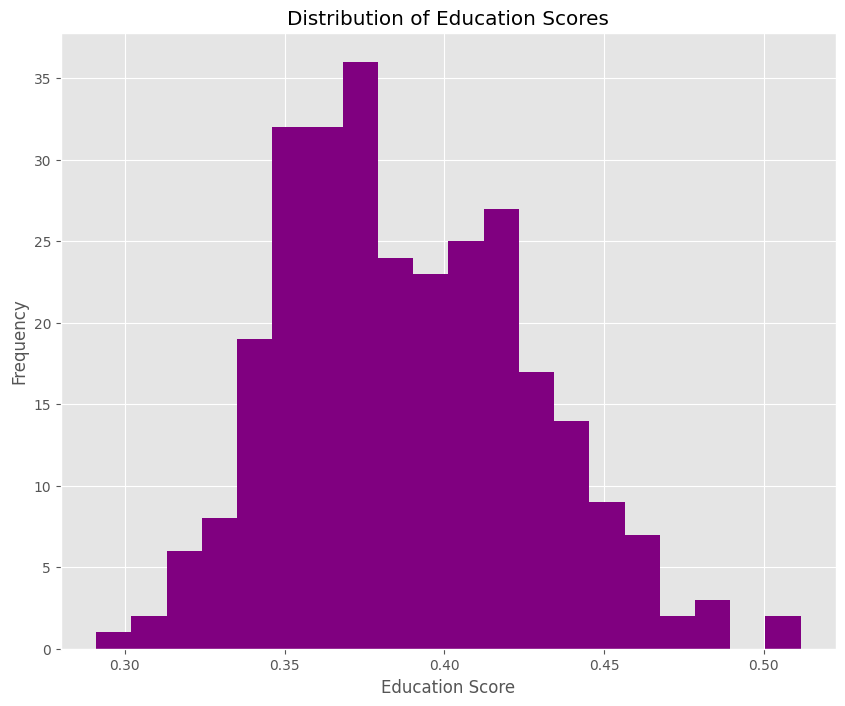

In [22]:
plt.hist(edu_stats_copy['Education Score'], bins=20, color='purple')
plt.xlabel('Education Score')
plt.ylabel('Frequency')
plt.title('Distribution of Education Scores')
plt.show()